In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("C:/Users/dell/Downloads/100-days-of-machine-learning-main/day35-complete-case-analysis/data_science_job.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
cols=[var for var in df.columns if df[var].isnull().mean()>0 and df[var].isnull().mean()<0.05]

In [6]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
new_df=df[cols].dropna()

In [8]:
new_df.shape

(17182, 5)

In [9]:
df.shape

(19158, 13)

In [10]:
rem=len(new_df)/len(df)

In [11]:
rem

0.8968577095730244

<Axes: xlabel='training_hours', ylabel='Count'>

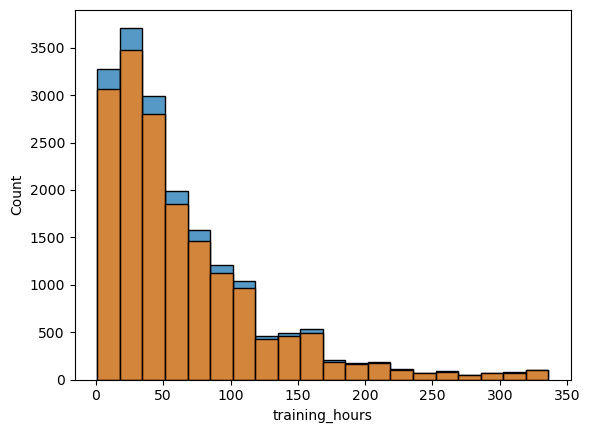

In [12]:
sns.histplot(x="training_hours",data=df,bins=20)
sns.histplot(x="training_hours",data=new_df,bins=20)

<Axes: >

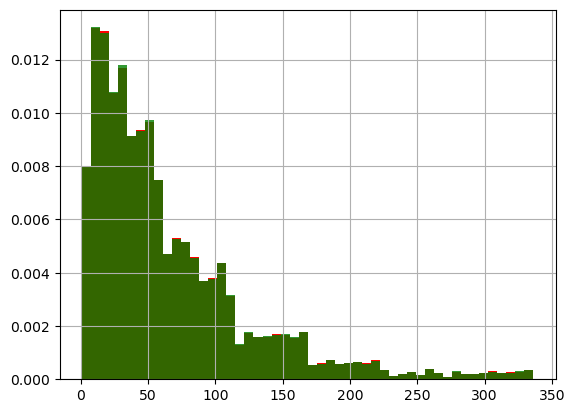

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

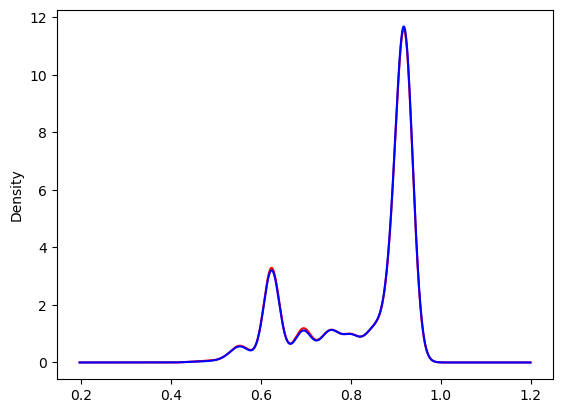

In [14]:
fig=plt.figure()

ass=fig.add_subplot(111)

df["city_development_index"].plot.density(color="red")
new_df["city_development_index"].plot.density(color="blue")

<Axes: ylabel='Density'>

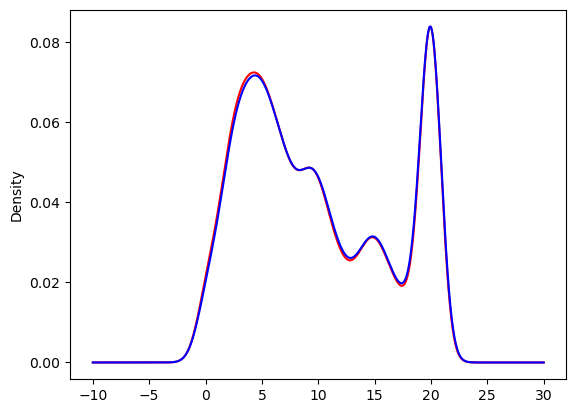

In [15]:
df["experience"].plot.density(color="red")

new_df["experience"].plot.density(color="blue")

<Axes: >

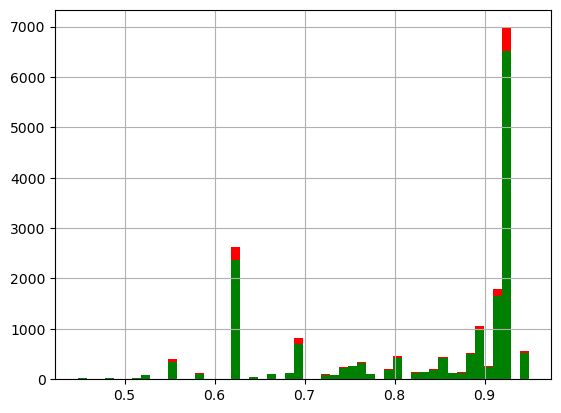

In [19]:
fig=plt.figure()

ax=fig.add_subplot(111)

df["city_development_index"].hist(bins=50,ax=ax,color="red")

new_df["city_development_index"].hist(bins=50,ax=ax,color="green")

In [25]:
temp=pd.concat([
    df["enrolled_university"].value_counts()/len(df),
    new_df["enrolled_university"].value_counts()/len(new_df)
],axis=1)


In [26]:
temp.columns=["original","cca"]

In [27]:
temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [21]:
df["enrolled_university"].value_counts()

enrolled_university
no_enrollment       13817
Full time course     3757
Part time course     1198
Name: count, dtype: int64